<a href="https://colab.research.google.com/github/RebekahRussel/Iris-Flower-Classification/blob/main/ML_iris_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x=df.drop('species',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=df['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.3,random_state=40)

In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(45, 4) (105, 4) (45,) (105,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
p=model.predict(xtest)
p

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(ytest,p)*100
print('testing accuracy:',round(a,2),'%')

testing accuracy: 93.33 %


In [ ]:
p1=model.predict(xtrain)
p1

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a1=accuracy_score(ytrain,p1)*100
a1

100.0

In [ ]:
print('training accuracy:',a1)

training accuracy: 100.0


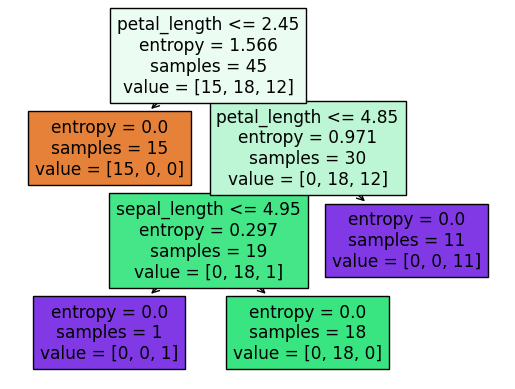

In [ ]:
from sklearn import tree
tree.plot_tree(model,feature_names=x.columns,max_depth=3,filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
p=model.predict(xtest)
p

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(ytest,p)*100
print('testing accuracy:',round(a,2),'%')

testing accuracy: 93.33 %


In [ ]:
p1=model.predict(xtrain)
p1

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a2=accuracy_score(ytrain,p1)*100
print("training accuracy:",a2,'%')

training accuracy: 100.0 %


In [ ]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(xtrain,ytrain)

SVC()

In [ ]:
p=model2.predict(xtest)
p

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0])

In [ ]:
a1=accuracy_score(ytest,p)*100
print('testing accuracy:',round(a1,2),'%')

testing accuracy: 93.33 %


In [ ]:
p1=model2.predict(xtrain)
p1

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a2=accuracy_score(ytrain,p1)*100
print("training accuracy:",round(a,2),'%')

training accuracy: 93.33 %


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(xtrain,ytrain)



KNeighborsClassifier()

In [ ]:
p=model3.predict(xtest)
p

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0])

In [ ]:
a=accuracy_score(ytest,p)*100
print('testing accuracy:',round(a,2),'%')

testing accuracy: 94.29 %


In [ ]:
p1=model3.predict(xtrain)
p1

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a1=accuracy_score(ytrain,p1)*100
print("training accuracy:",round(a1,2),'%')

training accuracy: 95.56 %


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
model4=GaussianNB()
model4.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
p=model4.predict(xtrain)
p

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       2])

In [ ]:
a=accuracy_score(ytrain,p)*100
print('training accuracy:',round(a,2),'%')

training accuracy: 95.56 %


In [ ]:
p1=model4.predict(xtest)
p1

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy",round(a1,2),"%")

testing accuracy 94.29 %


In [ ]:
model5=MultinomialNB()
model5.fit(xtrain,ytrain)

MultinomialNB()

In [ ]:
p=model5.predict(xtrain)
p

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1])

In [ ]:
a=accuracy_score(ytrain,p)*100
print("trainning accuracy:",round(a,2),"%")

trainning accuracy: 73.33 %


In [ ]:
p1=model5.predict(xtest)
p1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),"%")

testing accuracy: 63.81 %


In [ ]:
model6=BernoulliNB()
model6.fit(xtrain,ytrain)

BernoulliNB()

In [ ]:
p=model6.predict(xtrain)
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
a=accuracy_score(ytrain,p)*100
print("trainning accuracy:",round(a,2),"%")

trainning accuracy: 40.0 %


In [ ]:
p1=model6.predict(xtest)
p1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),"%")

testing accuracy: 30.48 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
model7=AdaBoostClassifier()
model7.fit(xtrain,ytrain)


AdaBoostClassifier()

In [ ]:
p=model7.predict(xtrain)
p

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a=accuracy_score(ytrain,p)*100
print("trainind accuracy:",round(a,2),'%')

trainind accuracy: 100.0 %


In [ ]:
p1=model7.predict(xtest)
p1

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),'%')

testing accuracy: 93.33 %


In [ ]:
model8=GradientBoostingClassifier()
model8.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [ ]:
p=model8.predict(xtrain)
p

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a=accuracy_score(ytrain,p)*100
print("training accuracy:",round(a,2),'%')

training accuracy: 100.0 %


In [ ]:
p1=model8.predict(xtest)
p1

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testing accuracy:",round(a1,2),"%")

testing accuracy: 94.29 %


In [ ]:
from xgboost import XGBClassifier
model9=XGBClassifier()
model9.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
p=model9.predict(xtrain)
p

array([1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       1])

In [ ]:
a=accuracy_score(ytrain,p)*100
print("training accuracy:",round(a,2),"%")

training accuracy: 100.0 %


In [ ]:
p1=model9.predict(xtest)
p1

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0])

In [ ]:
a1=accuracy_score(ytest,p1)*100
print("testng accuracy:",round(a1,2),"%")

testng accuracy: 94.29 %


In [ ]:
a=[[1.4,2.3,2.8,3.1]]
b=model2.predict(a)
b


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
a=input('Enter sepal length')
b=input('Enter sepal width')
c=input('Enter petal length')
d=input('Enter petal width')
v=[[a,b,c,d]]
n=model2.predict(v)
n


Enter sepal length5.1
Enter sepal width3.5
Enter petal length1.4
Enter petal width0.2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])